# Project: TMDB_movies Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this report we will walk through **TMDB movies** using a database contains 10,000+ movie, each movie has a set of attributes such as budget, title, director, revenue and so on.\
> Using this database we try to know what is the major attributes that can affect on movie industry and how these attributes correlate.

In [1]:
# Importing our Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('tmdb-movies.csv')

In [3]:
df.shape

(10866, 21)

In [4]:
# Checking either the column's values are readable or not 
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


### Main Questions:
>* What are the most three genre produced?
>* How does movie genre and run time affects on movies rate?
>* What are the most and the lowest genres the dirctors like to work on?
>* How does each genre cost and affect on the revenue?
>* What is the the most produced genre in the last year and 1990?
>* what is the relation between movie time and the budget?

<a id='wrangling'></a>
## Data Wrangling
> In this section of the report, we will clean our data, trim it and prepare it for answering our questions.

###  Assessing Data:

In [5]:
print(f'Number of columns in our database is: {df.shape[0]}')
print(f'Number of columns in our database is: {df.shape[1]}')

Number of columns in our database is: 10866
Number of columns in our database is: 21


In [6]:
# Checking either column's data types are matching with the values or not
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
# Checking the null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
# Showing the main statistical attributes for the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Asssessing Data Conclusions:
> 1. The data is not complicated 
> 2. There are many unnecessary data like id, homepage, tagline and release_date
> 3. The budget and revenue also need to be deleted because there is update for this column
> 4. There is Null values need to be dealed with
> 5. Data types are matching with the data values
> 6. The values need a little adjustement

### Cleaning Data:

In [10]:
# Lets start with dropping unnecessary columns
drop = ['id','imdb_id','budget','release_date','homepage','tagline','overview','keywords','revenue']
df = df.drop(drop,axis = 1)

In [11]:
#very well, lets check our columns
print(f'Number of columns in our database is: {df.shape[0]}')
print(f'Number of columns in our database is: {df.shape[1]}')

Number of columns in our database is: 10866
Number of columns in our database is: 12


In [12]:
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


In [13]:
# renaming the columns
df.rename(columns={'original_title':'title'},inplace=True)
df.rename(columns={'budget_adj':'budget'},inplace=True)
df.rename(columns={'revenue_adj':'revenue'},inplace=True)
df.head(1)

,popularity,title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


In [14]:
# making fuction to know the number of nulls in each column
def cols():
    for col in df:
        print(f'cloumn is: {col} ,Null values are: {df[col].isnull().sum()} , dtype is: {df[col].dtypes}')
cols()

cloumn is: popularity ,Null values are: 0 , dtype is: float64
cloumn is: title ,Null values are: 0 , dtype is: object
cloumn is: cast ,Null values are: 76 , dtype is: object
cloumn is: director ,Null values are: 44 , dtype is: object
cloumn is: runtime ,Null values are: 0 , dtype is: int64
cloumn is: genres ,Null values are: 23 , dtype is: object
cloumn is: production_companies ,Null values are: 1030 , dtype is: object
cloumn is: vote_count ,Null values are: 0 , dtype is: int64
cloumn is: vote_average ,Null values are: 0 , dtype is: float64
cloumn is: release_year ,Null values are: 0 , dtype is: int64
cloumn is: budget ,Null values are: 0 , dtype is: float64
cloumn is: revenue ,Null values are: 0 , dtype is: float64


In [15]:
# but we will convert them into string values 
df.fillna('Unknown',inplace = True)

In [16]:
# to make the popularity rate more readable
df['popularity'] = df.popularity.round(2)
df.head(1)

,popularity,title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


In [17]:
# the generes, cast and production_companies are seperated wity | and can not reach the data easily
# so lets covert these columns into list of strings
df['genres'] = df['genres'].str.split('|')
df['cast'] = df['cast'].str.split('|')
df['production_companies'] = df['production_companies'].str.split('|')

In [18]:
# now we need the main super star and the main production company and renamin their columns
df['cast'] = df['cast'].apply(lambda x: x[0])
df.rename(columns={'cast':'super_star'},inplace=True)

df['production_companies'] = df['production_companies'].apply(lambda x: x[0])
df.rename(columns={'production_companies':'production_companie'},inplace=True)

In [19]:
# explodeing genres to be easy to deal with the different genres fo the same column
df_ex = df.explode('genres')

In [20]:
df_ex.head(5)

,popularity,title,super_star,director,runtime,genres,production_companie,vote_count,vote_average,release_year,budget,revenue
0,32.99,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.99,Jurassic World,Chris Pratt,Colin Trevorrow,124,Adventure,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.99,Jurassic World,Chris Pratt,Colin Trevorrow,124,Science Fiction,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.99,Jurassic World,Chris Pratt,Colin Trevorrow,124,Thriller,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.42,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,6185,7.1,2015,1.379999e+08,3.481613e+08


Now we cleared and specified data and ready for the next step.

<a id='eda'></a>
## Exploratory Data Analysis
> In this section we will move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section.

### Q1 What are the most three genre produced??
> The first question make us able to know the distribution of the genres, in my openion it's important to know what is the most needed genre, which genre is not the best choice if i need to make a new movie and answering many question.
>
> To answer this question we need first to neglect the movies that has unkown genres, its ok we have a wide range of movies so a hundred movies will not affect then we need to count the movies for each genre then plot them.

In [21]:
# first extract the data that movie genre is known
known_df = df_ex[df_ex['genres']!= 'Unknown']

In [22]:
# function to calculate the mean of y grouped by x in the known_df
def df_col(x,y):
    return known_df.groupby(x)[y].mean()

In [23]:
# getting the count of the genres
genres = known_df['genres'].value_counts()
genres

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

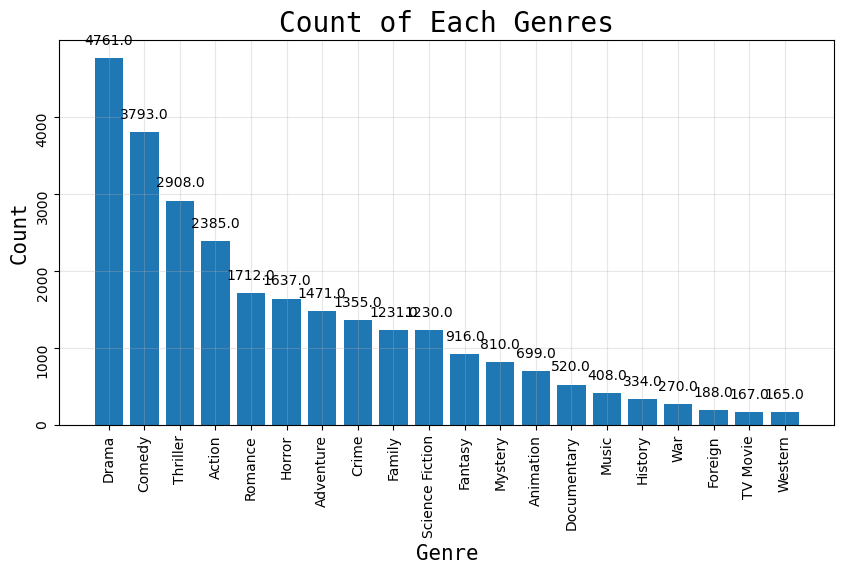

In [24]:
plt.figure(figsize=(10,5))
plt.bar(genres.index, genres.values)

# to write the values of each movies genres count
def coordinates():
    for x,y in zip(genres.index,genres.values):
        label = "{:.1f}".format(y)
        plt.annotate(label, # this is the text
             (x,y), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(0,10), # distance from text to points (x,y)
             ha='center') # horizontal alignment can be left, right or center
coordinates()
    
plt.title('Count of Each Genres',fontname = 'monospace',fontsize=20)
plt.xlabel('Genre',fontname = 'monospace',fontsize=15)
plt.ylabel('Count',fontname = 'monospace',fontsize=15)

plt.tick_params(rotation = 90)
plt.grid(alpha=0.3,)
plt.show()

### Q2  How does movie genre and run time affects on movies rate?
> The second question make us see the correlation between the average rate of each genre and each genre charactrestic like runtime.
>
> To answer this question we have to get the average of rates and runtime for each genre the plot them

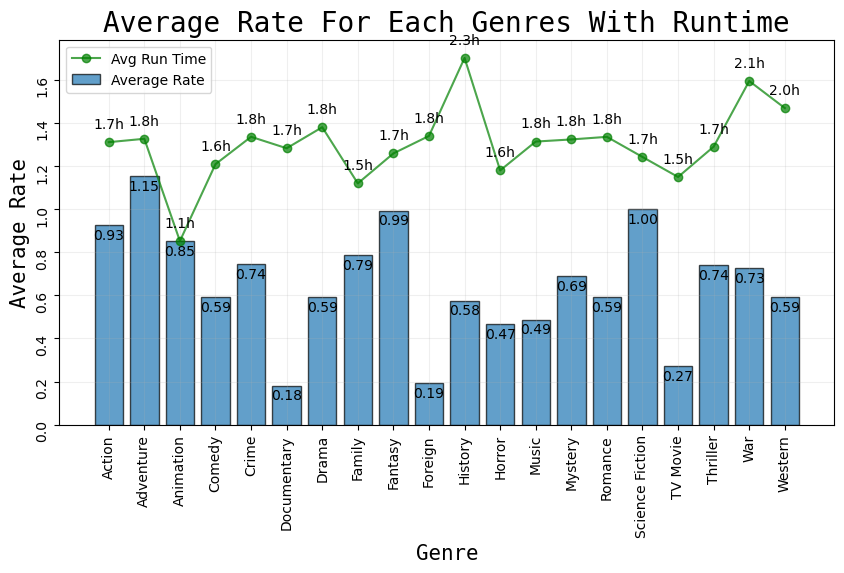

In [25]:
# getting the average for each popularity and runtime
avg_rate = df_col('genres','popularity')
avg_run = df_col('genres','runtime')

# plotting them
plt.figure(figsize=(10,5))
plt.bar(avg_rate.index,avg_rate.values,alpha = 0.7,edgecolor='black')
plt.plot(avg_run.index,avg_run.values/80,alpha = 0.7,color='green',marker='o')

# to write the values of the Average Rate
for x,y in zip(avg_rate.index,avg_rate.values):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
         (x,y), # these are the coordinates to position the label
         textcoords="offset points", # how to position the text
         xytext=(0,-10), # distance from text to points (x,y)
         ha='center') # horizontal alignment can be left, right or center

# to write the values of the Average Run Time
for x,y in zip(avg_run.index,avg_run.values/80):
    label = "{:.1f}h".format(y*80/60) # to get the value in hour
    plt.annotate(label, # this is the text
         (x,y), # these are the coordinates to position the label
         textcoords="offset points", # how to position the text
         xytext=(0,10), # distance from text to points (x,y)
         ha='center') # horizontal alignment can be left, right or center

plt.xlabel('Genre',fontname = 'monospace',fontsize=15)
plt.ylabel('Average Rate',fontname = 'monospace',fontsize=15)

# To rotate the X axis genres
plt.tick_params(rotation =90)
plt.legend(['Avg Run Time','Average Rate'])

# To remove top and right spines
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True

plt.grid(alpha=0.2)
plt.title('Average Rate For Each Genres With Runtime',fontname = 'monospace',fontsize=20)
plt.show()

###  Q3 What are the most and the lowest genres the dirctors like to work on?
> Also directors may have their effect in this indusrty and may be the reason for attracting more viewrs to the movie
>
> So this question may be answered in many way in my case I prefered to get the number of the directors for each genre then we can easily choose which genere to work in and the directors in this genre that already achieved a good rate.

In [26]:
# Knowing the number of directors for each genre
dir_genres= known_df.groupby('genres').director.nunique()
dir_genres= dir_genres.sort_values(ascending=False)

In [27]:
# to make a gredient of color we need each color code
cust_color = ['#afddfa',
'#aad8f5',
'#a5d3ef',
'#a0cfea',
'#9ccae5',
'#97c5df',
'#92c0da',
'#8dbcd5',
'#89b7d0',
'#84b2ca',
'#7faec5',
'#7ba9c0',
'#76a5bb',
'#72a0b6',
'#6d9bb1',
'#6997ac',
'#6492a7',
'#608ea2',
'#5b899d',
'#578598',]

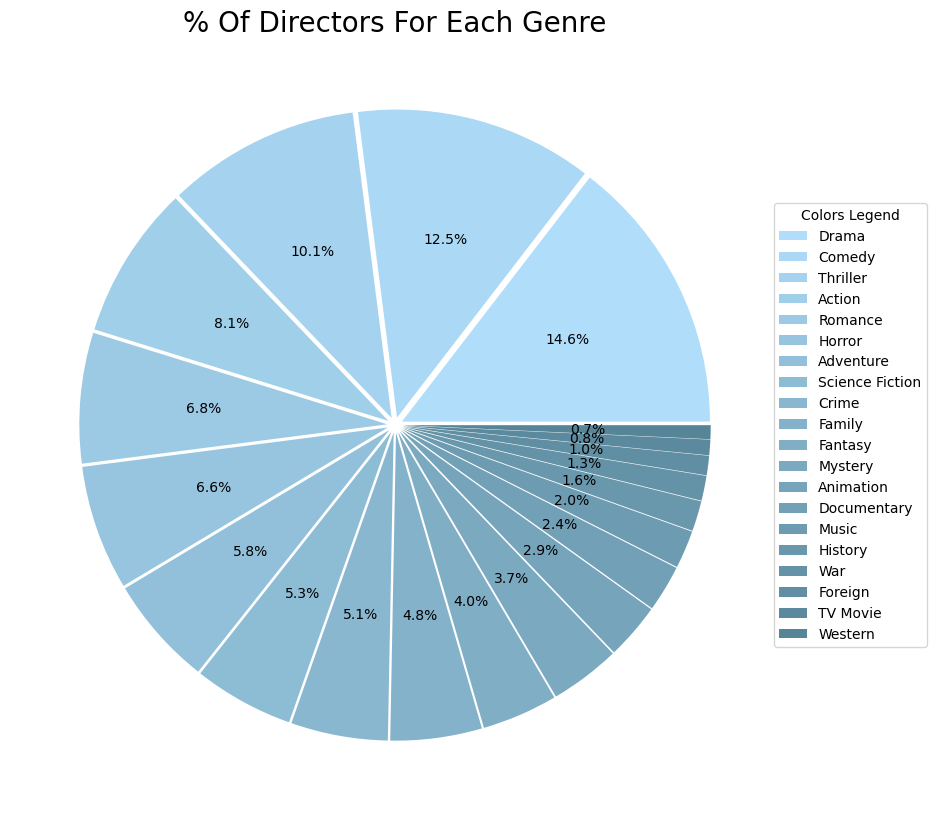

In [28]:
plt.figure(figsize=(10,10))
plt.pie(dir_genres.values, labels=None, autopct='%1.1f%%', colors=cust_color, explode = [0.025 for i in range(len(cust_color))])
plt.title('% Of Directors For Each Genre',fontsize=20)
plt.legend(dir_genres.index, loc='center right', bbox_to_anchor=(1.2,0.5), title='Colors Legend')
plt.show()

### Q4 How does each genre cost and affect on the revenue?
> This question is very important, to know which genre takes high budget and gains an excelent revenue is important for each investor.

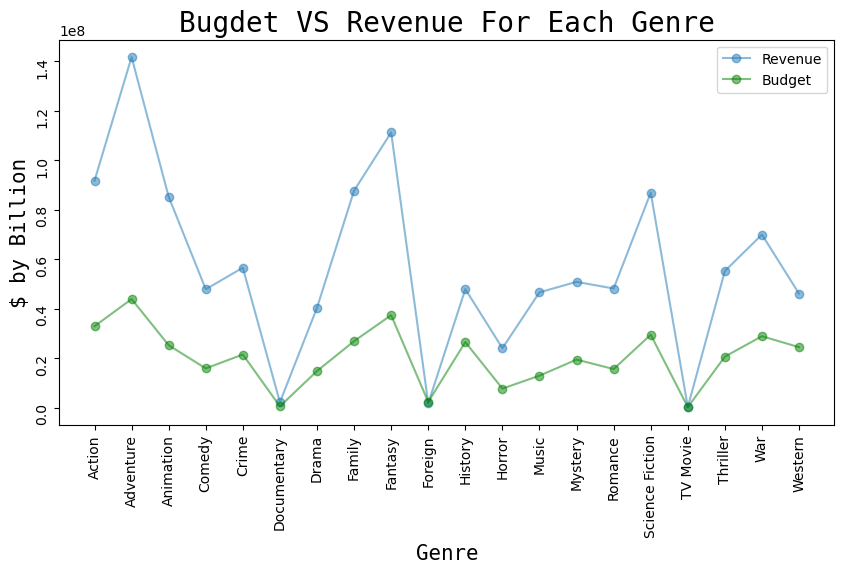

In [29]:
# knowing the average of the budget and the revenue for each genre
plt.figure(figsize=(10,5))
rev_genre= df_col('genres','revenue')
budget_genre= df_col('genres','budget')

plt.plot(rev_genre.index,rev_genre.values,marker='o',alpha=0.5)
plt.plot(budget_genre.index,budget_genre.values,marker='o',color='green',alpha=0.5)

plt.xlabel('Genre',fontname = 'monospace',fontsize=15)
plt.ylabel('$ by Billion',fontname = 'monospace',fontsize=15)

plt.tick_params(rotation =90)
plt.legend(['Revenue','Budget'])

plt.title('Bugdet VS Revenue For Each Genre',fontname = 'monospace',fontsize=20)
plt.show()

### Q5 What is the the most produced genre in the last year and 1990?
> This question is to know how does the movie taste changed in the last 25 year and is it can change in future or not, by making comparsion between the count of movies in 2015 and 1990.

In [30]:
# to get every count for every genre for the years years
# first we need to get the last year and 1990
years = known_df['release_year'].sort_values(ascending=False).unique()
years = years.tolist()
last_years = []
last_years.append(years[0])
last_years.append(years[years.index(1990)])
last_years


[2015, 1990]

In [31]:
# now we need to get the data for years
last_genre = known_df[known_df['release_year'].isin(last_years)]
last_genre.head()

,popularity,title,super_star,director,runtime,genres,production_companie,vote_count,vote_average,release_year,budget,revenue
0,32.99,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.99,Jurassic World,Chris Pratt,Colin Trevorrow,124,Adventure,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.99,Jurassic World,Chris Pratt,Colin Trevorrow,124,Science Fiction,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.99,Jurassic World,Chris Pratt,Colin Trevorrow,124,Thriller,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.42,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,6185,7.1,2015,1.379999e+08,3.481613e+08


In [32]:
# now we have get the count of genres for 2015
genre_2015= last_genre[last_genre['release_year']==last_years[0]]
genre_2015= genre_2015['genres'].value_counts()
genre_2015

Drama              260
Thriller           171
Comedy             162
Horror             125
Action             107
Science Fiction     86
Adventure           69
Romance             57
Documentary         57
Crime               51
Family              44
Mystery             42
Animation           39
Music               33
Fantasy             33
TV Movie            20
History             15
War                  9
Western              6
Name: genres, dtype: int64

In [33]:
# now we have get the count of genres for 1990
genre_1990= last_genre[last_genre['release_year']==last_years[1]]
genre_1990= genre_1990['genres'].value_counts()
genre_1990

Drama              60
Comedy             48
Thriller           46
Action             39
Crime              30
Horror             26
Adventure          23
Romance            19
Science Fiction    18
Mystery            14
Fantasy            13
Family             12
History             4
Animation           4
Western             3
Music               2
War                 2
Foreign             1
TV Movie            1
Documentary         1
Name: genres, dtype: int64

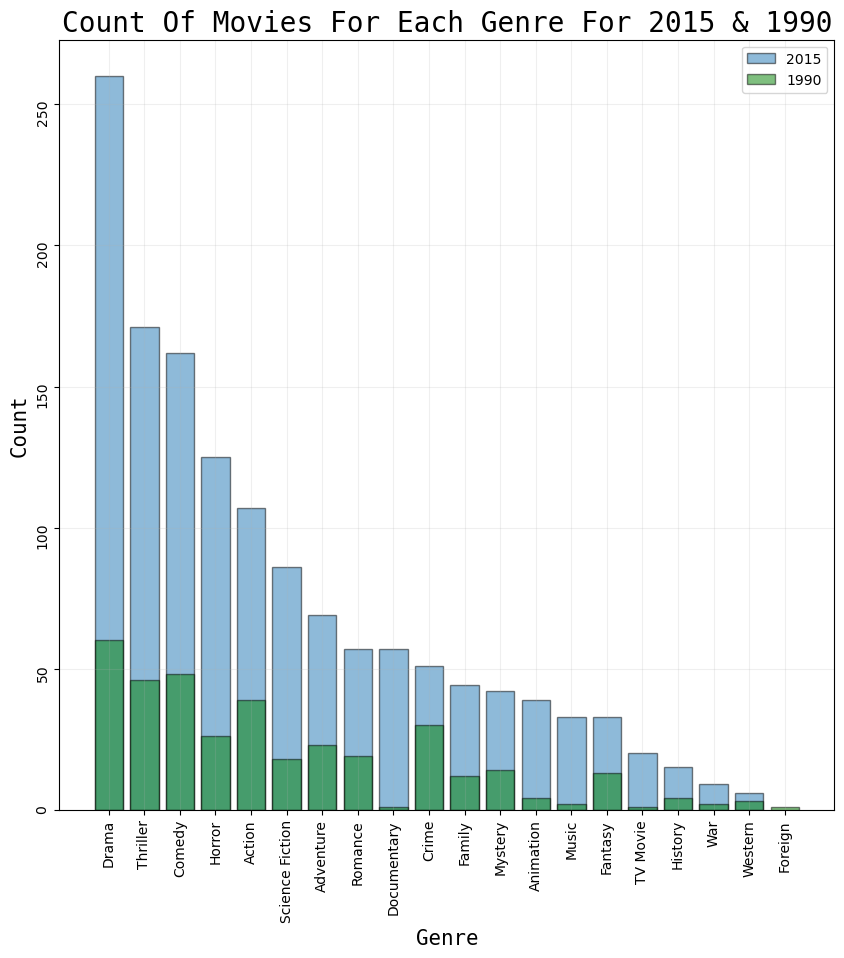

In [34]:
plt.figure(figsize=(10,10))
plt.bar(genre_2015.index,genre_2015.values,alpha = 0.5, edgecolor='black')
plt.bar(genre_1990.index,genre_1990.values,alpha = 0.5, color = 'green', edgecolor='black')

plt.xlabel('Genre',fontname = 'monospace',fontsize=15)
plt.ylabel('Count',fontname = 'monospace',fontsize=15)

# To rotate the X axis genres
plt.tick_params(rotation =90)
plt.legend(['2015','1990'])

# To remove top and right spines
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True

plt.grid(alpha=0.2)
plt.title('Count Of Movies For Each Genre For 2015 & 1990',fontname = 'monospace',fontsize=20)
plt.show()

## Q6 what is the relation between movie time and the budget?
> Here a question about movies characterstics budget and the runtime and is there a relation between them or now.

In [35]:
# before we plot and answer this question we first need to make runtime more readable 
df.head(1)

,popularity,title,super_star,director,runtime,genres,production_companie,vote_count,vote_average,release_year,budget,revenue
0,32.99,Jurassic World,Chris Pratt,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09


In [36]:
# first we need to make groups for each hour in new list
runtime = []
for i in df.runtime:
    if i <= 60:
        runtime.append('1 Hour')
    elif 60 < i <= 120:
        runtime.append('2 Hours')
    elif 120 < i <= 180:
        runtime.append('3 Hours')
    elif i > 180:
        runtime.append('4+ Hours')

In [37]:
# now we need to make new column contains these groups
df['runtime_groups'] = runtime
df.head(1)

,popularity,title,super_star,director,runtime,genres,production_companie,vote_count,vote_average,release_year,budget,revenue,runtime_groups
0,32.99,Jurassic World,Chris Pratt,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09,3 Hours


In [38]:
# because we grouped the runtime
# lets get the average budget for each group of runtime
average_buget_time = df.groupby('runtime_groups')['budget'].mean()

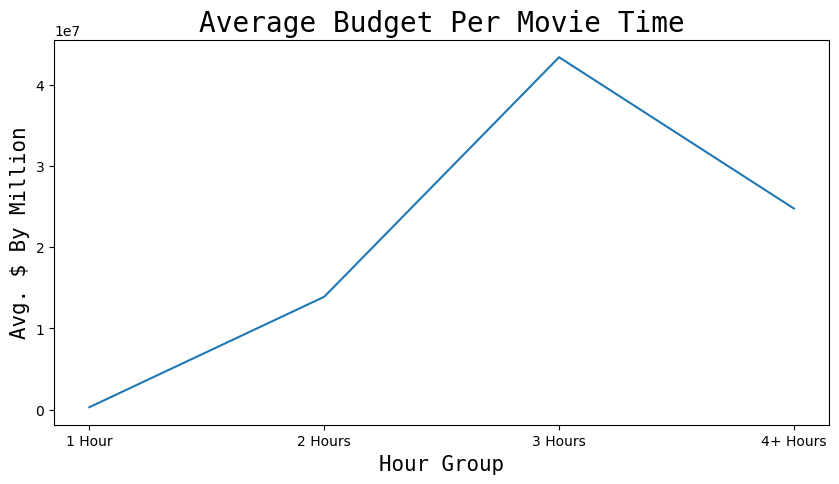

In [39]:
plt.figure(figsize=(10,5))
plt.plot(average_buget_time.index,average_buget_time.values)
plt.xlabel('Hour Group',fontname = 'monospace',fontsize=15)
plt.ylabel('Avg. $ By Million',fontname = 'monospace',fontsize=15)
plt.title('Average Budget Per Movie Time',fontname = 'monospace',fontsize=20)
plt.show()

#### Another plot shows us the realtion for each movie run time and the budget to make the vision more clear.

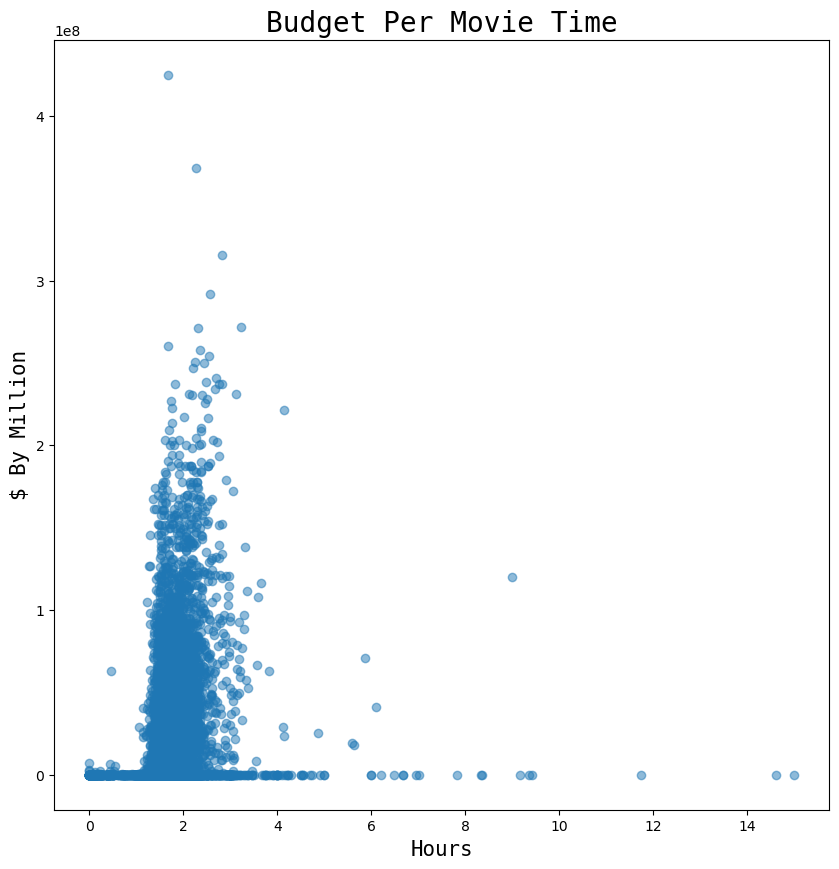

In [40]:
# Scatter plot figure shows the relation between all move runtime and their budget
plt.figure(figsize=(10,10))
plt.scatter(df.runtime.values/60,df.budget.values ,alpha=0.5)
plt.xlabel('Hours',fontname = 'monospace',fontsize=15)
plt.ylabel('$ By Million',fontname = 'monospace',fontsize=15)
plt.title('Budget Per Movie Time',fontname = 'monospace',fontsize=20)
plt.show()

<a id='limitations'></a>
## Limitations
The data was partially clear and easy to read but there was limitaions:
* Choosing column to analysis and if this column will answer my question without making adjustments or not.
* Each movie has many genres which will make the movie to be dublicated in many genre.
* Personal lack of experience with dealing with programming functions and method, what leaded to take many hours to solve one problem, but it was really good and I learned alot.
* Personal lack of experience with dealing with visualization, which leaded me to stop the project and learn matplotlib and seaborn to understand what's on the matplotlib documentations and stack overflow if I faced and problem. 

<a id='conclusions'></a>
## Conclusions
**Q1 What are the most three genres produced?**
> * The most three qenres produced are *drama, comedy, thriller*.

**Q2 How does movie genre and run time affects on movies rate?**
> * Its obvious that the genres the have an average runtime is around 1.5 hours have the higher rate like *adventure, fantasy, science fiction*.
> * Also low run average time was very useful in *animation genre* with that has high average rating.
> * On the other hand the genres with high runtime over 2 hours in average have medium rate like *history and war genres*.

**Q3 What are the most and the lowest genres the dirctors like to work on?**
> * The most genres the directos works on are the most genres produced in Q1 *drama, comedy, thriller*, and these three genre has an average rate higher than the medium, maybe means that these genres are the safe zone for the directors.
> * The lowest genres the directos works on are *western, tv movie, and foreign*, altough the foreign genre has a medium average rate.

**Q4 How does each genre cost and affect on the revenue?**
> * It's obvious that *adventure, fantasy and science fiction* from Q2 have medium average run time have also the higer cost and the higher revenue.
> * On the other hand *documentary, foreign and tv movies* have the lowest average cost and approximately no revenue.

**Q5 What is the the most produced genre in the last year and 1990?**
> * The most produced genre in 2015 and 1990 are *drama, thriller and comedy* the taste doesn't change alot but the difference of the number of movies generated in these years is huge for example drama 1990 produced around 60 movie but in 2015 produced 260 movie, approximately 200 movie.
> * We can also see that *documentary, music, animation and tv movies* counts in 1990 wasn't exceed 10 movies.

**Q6 what is the relation between movie time and the budget?**
> * We can find that in general movies around 3 hours runtime costs alot in average.
> * But in details from one to 4 hours are the most expensive movies specially 2 hours movies ofcourse the cost varies depending on other characteristics like the genre, but the runtime around 2 hours have a huge variaty of budgets.